### position별 EDA
#### 1. minutes 히스토그램 및 박스플롯 확인 -> 3사분위수 이하 제거 (비주전 선수 영향 최소화)
#### 2. 변수별 기초통계량 확인 
#### 3. 변수별 분포 및 상관관계 확인 -> 각 포지션별로 상관이 높은 변수 삭제 혹은 전처리 필요

### 전처리
#### 1. 포지션별 불필요한 변수 제거
#### 2. 파생변수 생성 패스 성공률 관련 변수 추가
#### 3. 패스 관련 변수를 minutes/90 으로 나눠주기 

### PCA 실시
#### 1. 분산 설명력, 고유벡터 확인
#### 2. 시각화 및 인사이트 도출 

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
import pandas as pd 
import numpy as np

In [3]:
#그래프 출력 조건

# minus font 
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
mpl.rcParams['axes.unicode_minus'] = False 

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# customize matplitlib
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['font.size'] = 10

In [29]:
df = pd.read_csv("D:/경기대/2학년_2학기/dna 동아리/23_겨울방학프로젝트/전처리csv/player_passing_eda.csv", encoding='utf-8')

In [5]:
df.head()

,player,position,team,age,birth_year,minutes,round,passes,passes_total_distance,passes_progressive_distance,passes_short,passes_medium,passes_long,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Ousmane Dembélé,FW,France,29.0,1997,270.0,group stage,191.0,2330.0,475.0,89.0,63.0,25.0,7.0,13.0,6.0,10.0
1,Antoine Griezmann,MF,France,23.0,1991,81.0,round of 16,329.0,4905.0,1377.0,135.0,112.0,66.0,26.0,10.0,5.0,19.0
2,Theo Hernández,DF,France,25.0,1997,270.0,group stage,339.0,4672.0,1347.0,169.0,119.0,39.0,23.0,7.0,5.0,16.0
3,João Cancelo,DF,Portugal,27.0,1994,270.0,group stage,271.0,3800.0,864.0,138.0,87.0,35.0,10.0,6.0,5.0,12.0
4,Achraf Hakimi,DF,Morocco,30.0,1998,549.0,semi finals,382.0,4121.0,1792.0,232.0,80.0,32.0,14.0,6.0,5.0,10.0


#### 포지션별 출전시간 산점도 확인

In [6]:
def position_plot(n,df): #자기 포지션에 맞는 n번호 입력 
    
    if n == 1:
        df = df[df['position']=='GK']
    elif n == 2:
        df = df[df['position']=='DF']
    elif n == 3:
        df = df[df['position']=='MF']
    elif n == 4:
        df = df[df['position']=='FW']
    
    return(plt.boxplot(df['minutes']))

In [ ]:
position = ['GK','DF','MF','FW']

for i in range(len(position)):
    plt.subplot(2, 2, i+1)
    position_plot(i+1,df)
    plt.title(position[i], fontsize=10)

#### 사전 분포 확인

In [7]:
#자신이 보고자 하는 position 확인

df_eda = df[df['position'] == 'FW']
df_eda = df_eda.drop(columns=['player','position','team','age','birth_year','round'],axis=1)

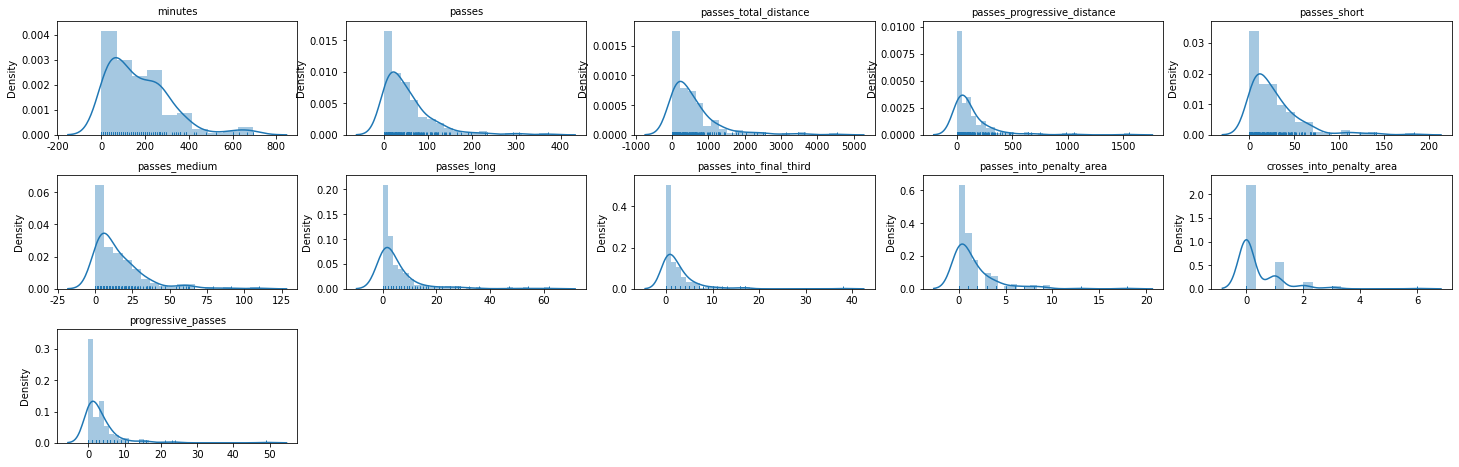

In [8]:
import warnings
warnings.filterwarnings( 'ignore' )

plt.figure(figsize=(25, 10)) # 가로, 세로 
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35) #서브플롯 간 간격 조정

for i in range(len(df_eda.columns)):
  col = df_eda.columns[i]

  plt.subplot(4, 5, i+1)
  sns.distplot(x=df_eda[col], kde=True, rug=True)
  plt.title(col, fontsize=10)

### 사전 전처리
#### 포지션별 선수 출전시간 이상치 제거

In [30]:
#포지션별 minutes 특정 사분위 제거 함수

def position_eda(n,df,plot): #자기 포지션에 맞는 n번호 입력 
    
    if n == 1:
        df = df[df['position']=='GK']
    elif n == 2:
        df = df[df['position']=='DF']
    elif n == 3:
        df = df[df['position']=='MF']
    elif n == 4:
        df = df[df['position']=='FW']
    
    q1,q2,q3 = np.percentile(df['minutes'], [25,50,75]) #1,2,3사분위수
    iqr = q3-q1 
    lower_bound = q1 - (iqr * 1.5) #1사분위 이하 이상치
    upper_bound = q3 + (iqr * 1.5) #3사분위 이하 이상치
    middle_bound = q2 #중앙값
    
    if plot == 1:
        df = df[df['minutes'] > q1] #1사분위
    elif plot == 2:
        df = df[df['minutes'] > lower_bound] #이상치

    return(df) 

In [31]:
df = position_eda(4,df,1)

# 인덱스 재정렬
df = df.reset_index(drop=True)
df.head(5)

,player,position,team,age,birth_year,minutes,round,passes,passes_total_distance,passes_progressive_distance,passes_short,passes_medium,passes_long,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Ousmane Dembélé,FW,France,29.0,1997,270.0,group stage,191.0,2330.0,475.0,89.0,63.0,25.0,7.0,13.0,6.0,10.0
1,Hirving Lozano,FW,Mexico,32.0,1995,207.0,quarter finals,77.0,641.0,258.0,28.0,22.0,15.0,1.0,8.0,3.0,7.0
2,Junior Hoilett,FW,Canada,23.0,1990,90.0,group stage,59.0,743.0,324.0,26.0,14.0,13.0,3.0,6.0,3.0,6.0
3,Serge Gnabry,FW,Germany,30.0,1995,180.0,group stage,118.0,1060.0,281.0,72.0,25.0,3.0,1.0,4.0,3.0,3.0
4,Bruno Fernandes,FW,Portugal,21.0,1994,144.0,round of 16,233.0,3623.0,1060.0,109.0,56.0,54.0,17.0,9.0,2.0,23.0


#### 변수 관련 전처리

In [32]:
df.isnull().sum()

player                         0
position                       0
team                           0
age                            0
birth_year                     0
minutes                        0
round                          0
passes                         1
passes_total_distance          1
passes_progressive_distance    1
passes_short                   1
passes_medium                  1
passes_long                    1
passes_into_final_third        1
passes_into_penalty_area       1
crosses_into_penalty_area      1
progressive_passes             1
dtype: int64

In [33]:
df = df.fillna(0)
df = df.replace([np.inf, -np.inf], 0) #inf값을 nan으로 대체 후 0으로 처리 

In [34]:
df

,player,position,team,age,birth_year,minutes,round,passes,passes_total_distance,passes_progressive_distance,passes_short,passes_medium,passes_long,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Ousmane Dembélé,FW,France,29.0,1997,270.0,group stage,191.0,2330.0,475.0,89.0,63.0,25.0,7.0,13.0,6.0,10.0
1,Hirving Lozano,FW,Mexico,32.0,1995,207.0,quarter finals,77.0,641.0,258.0,28.0,22.0,15.0,1.0,8.0,3.0,7.0
2,Junior Hoilett,FW,Canada,23.0,1990,90.0,group stage,59.0,743.0,324.0,26.0,14.0,13.0,3.0,6.0,3.0,6.0
3,Serge Gnabry,FW,Germany,30.0,1995,180.0,group stage,118.0,1060.0,281.0,72.0,25.0,3.0,1.0,4.0,3.0,3.0
4,Bruno Fernandes,FW,Portugal,21.0,1994,144.0,round of 16,233.0,3623.0,1060.0,109.0,56.0,54.0,17.0,9.0,2.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Roberto Alvarado,FW,Mexico,30.0,1998,90.0,group stage,10.0,50.0,5.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0
128,Rogelio Funes Mori,FW,Mexico,22.0,1991,81.0,group stage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,Takuma Asano,FW,Japan,32.0,1994,180.0,group stage,28.0,227.0,44.0,15.0,6.0,1.0,3.0,0.0,0.0,0.0
130,Zakaria Aboukhlal,FW,Morocco,24.0,2000,180.0,finals,14.0,88.0,22.0,8.0,3.0,3.0,0.0,0.0,0.0,0.0


In [36]:
def function(df,n):
    df.iloc[:,n] = round(df.iloc[:,n]/(df['minutes']/90),1)
    
    return(df)

#n값에 시작할 열 번호지정
for i in range(7,17): #21인 이유는 22,23번은 성공률에 대한 것이므로 
    function(df,i)

In [38]:
df_eda = df.drop(columns=['player','position','team','age','birth_year','round','minutes'],axis=1)

# 열별로 scaling 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df_eda), columns=df_eda.columns, index = df_eda.index)

### 출전시간이 적은 선수 (1사분위수 이하), 필요없는 변수 제거, 표준화 변환 후 분포도

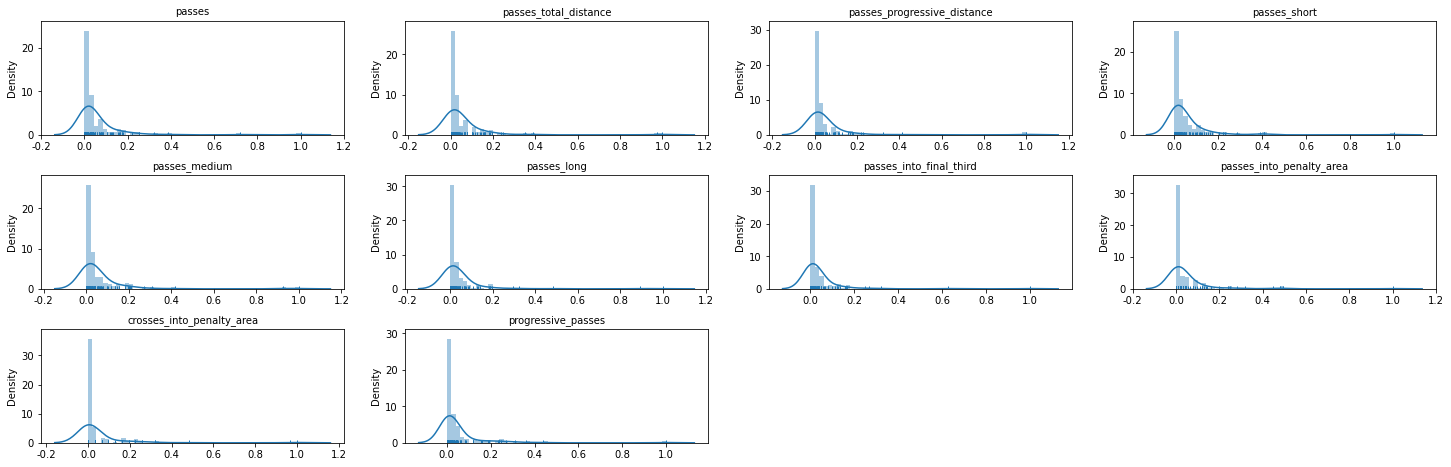

In [40]:
#변수별 분포 재확인
import warnings
warnings.filterwarnings( 'ignore' )

plt.figure(figsize=(25, 10)) # 가로, 세로 
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35) #서브플롯 간 간격 조정

for i in range(len(df_scale.columns)):
  col = df_scale.columns[i]

  plt.subplot(4, 4, i+1)
  sns.distplot(x=df_scale[col], kde=True, rug=True)
  plt.title(col, fontsize=10)

#### 이건 각자 포지션에 맞게 전처리할 것
#### assist 관련 변수 무의미 -> 제거
#### medium_passes_pct 변수 거의 1에 머무름 -> 제거
#### crosses_into_penalty_area 변수 거의 0~0.25에 머무름 -> 제거 

In [41]:
df_scale.shape

(132, 10)

In [247]:
#df_scale = df_scale.drop(columns=['assists','assisted_shots','medium_passes_pct','crosses_into_penalty_area'])

<AxesSubplot:title={'center':'pass_type'}>

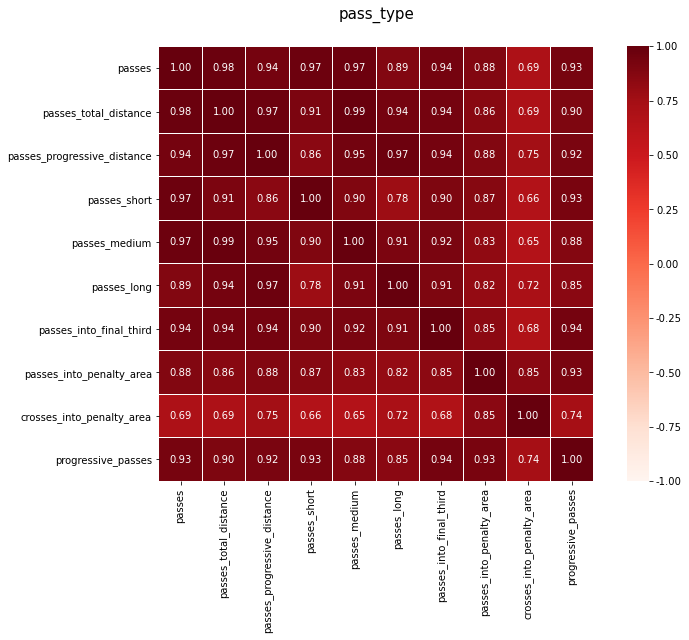

In [42]:
# 상관관계 히트맵 확인

plt.figure(figsize=(12, 8))
plt.title("pass_type", y = 1.05, size = 15)

sns.heatmap(df_scale.corr(), 
            linewidths = 0.1, #셀 사이 선을 집어넣음 
            vmax = 1.0, #최댓값 
            vmin = -1.0, #최솟값 
            square = True, 
            cmap = 'Reds',#맵 색깔
            linecolor = "white", #셀 사이 라인 색깔 
            annot = True, #각 셀의 표기 유무 및 그 값의 데이터타입 설정 
            fmt = '.2f', #각 셀의 값의 데이터 형태 (만약 소수2째자리까지 한다면 '.2f')
            annot_kws = {"size" : 10} #셀 안의 폰트 크기
           )

#### passes_total_distance 변수가 많은 변수와 높은 상관 -> 제거

In [43]:
df_scale = df_scale.drop(columns=['passes_total_distance'])

In [44]:
df_scale.columns

Index(['passes', 'passes_progressive_distance', 'passes_short',
       'passes_medium', 'passes_long', 'passes_into_final_third',
       'passes_into_penalty_area', 'crosses_into_penalty_area',
       'progressive_passes'],
      dtype='object')

### PCA 분석

In [49]:
from sklearn.decomposition import PCA

In [46]:
#표준화는 위에서 함 

# 고윳값을 기준으로 설명할 수 있는 분산량
pca = PCA(n_components=2) #주성분은 2개로 해야 2차원 산점도로 표현 쉬움
printcipalComponents = pca.fit_transform(df_scale)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pca1', 'pca2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [50]:
pca = PCA(n_components=7) #주성분은 2개로 해야 2차원 산점도로 표현 쉬움
printcipalComponents = pca.fit_transform(df_scale)

principalDf = pd.DataFrame(data=printcipalComponents, 
                           columns = [f"pca{num+1}" for num in range(7)])
# 주성분으로 이루어진 데이터 프레임 구성

In [51]:
pca_data = pd.DataFrame({'고윳값': pca.explained_variance_,
                        '기여율': pca.explained_variance_ratio_},
                       index=np.array([f"pca{num+1}" for num in range(7)]))
pca_data['누적 기여율'] = pca_data['기여율'].cumsum()
pca_data

,고윳값,기여율,누적 기여율
pca1,0.121529,0.871353,0.871353
pca2,0.009416,0.067512,0.938865
pca3,0.004524,0.032436,0.971301
pca4,0.001798,0.012890,0.984192
pca5,0.001134,0.008127,0.992319
pca6,0.000538,0.003860,0.996180
pca7,0.000304,0.002183,0.998362


#### 고윳값 (설명력)

In [47]:
print('각 주성분의 설명력:', pca.explained_variance_)
print('주성분의 기여율:', pca.explained_variance_ratio_)
print('전체 분산에 대한 기여율:',sum(pca.explained_variance_ratio_))

각 주성분의 설명력: [0.12152933 0.00941603]
주성분의 기여율: [0.87135338 0.067512  ]
전체 분산에 대한 기여율: 0.9388653771880288


#### 기여율 = 특정 주성분의 부산 비율 = 특정 고윳값의 비율 = 특정 주성분 고윳값/ 모든 주성분의 고윳값합

In [48]:
pca_data = pd.DataFrame({'고윳값': pca.explained_variance_,
                        '기여율': pca.explained_variance_ratio_},
                       index=np.array([f"pca{num+1}" for num in range(2)]))
pca_data['누적 기여율'] = pca_data['기여율'].cumsum()
pca_data

,고윳값,기여율,누적 기여율
pca1,0.121529,0.871353,0.871353
pca2,0.009416,0.067512,0.938865


#### 고유벡터 (eigenvector)

In [52]:
print('pca1의 고유벡터:', np.round(pca.components_[0],3), sep = '\n')
print('                                    ')
print('pca2의 고유벡터', np.round(pca.components_[1],3) , sep= '\n')

pca1의 고유벡터:
[0.34  0.375 0.298 0.359 0.35  0.309 0.326 0.326 0.311]
                                    
pca2의 고유벡터
[-0.209 -0.089 -0.161 -0.303 -0.099 -0.185  0.268  0.845 -0.03 ]


#### 각 변수별로 pca1,2에 어떤 영향을 주고 있는지 확인을 위해 데이터프레임화

In [53]:
a = np.round(pca.components_[0],3)
a = a.tolist()
b = np.round(pca.components_[1],3)
b = b.tolist()

In [54]:
pca_data = {'pca1' : a, 'pca2' : b}
df_pca = pd.DataFrame(pca_data, index= df_scale.columns)
df_pca

,pca1,pca2
passes,0.340,-0.209
passes_progressive_distance,0.375,-0.089
passes_short,0.298,-0.161
passes_medium,0.359,-0.303
passes_long,0.350,-0.099
passes_into_final_third,0.309,-0.185
passes_into_penalty_area,0.326,0.268
crosses_into_penalty_area,0.326,0.845
progressive_passes,0.311,-0.030


In [28]:
df_pca = df_pca.reset_index()

index = df_pca['index']
pca1 = df_pca['pca1']
pca2 = df_pca['pca2']

<BarContainer object of 13 artists>

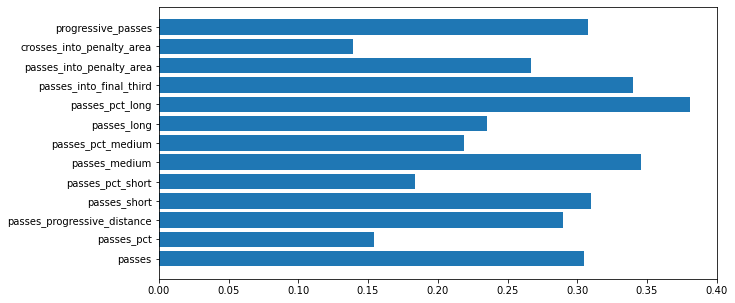

In [29]:
plt.figure(figsize=(10, 5))
plt.barh(index,pca1,label='pca1')

<BarContainer object of 13 artists>

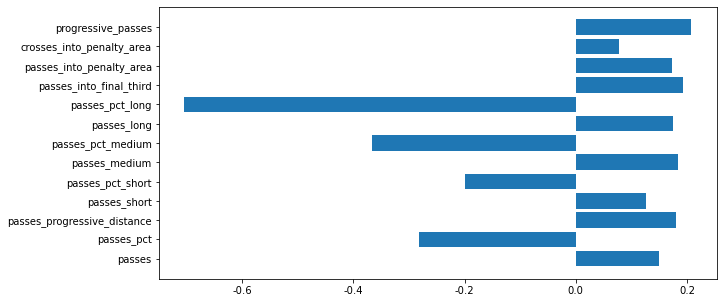

In [30]:
plt.figure(figsize=(10, 5))
plt.barh(index,pca2,label='pca2')

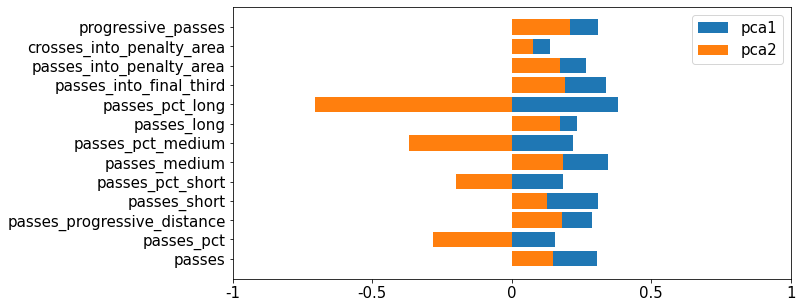

In [31]:
plt.figure(figsize=(10, 5))
plt.rcParams['font.size'] = 15
plt.barh(index,pca1,label='pca1')
plt.barh(index,pca2,label='pca2')
plt.xticks([-1,-0.5,0,0.5,1],('-1','-0.5','0','0.5','1'))
plt.legend()
plt.show()

#### 원본 데이터의 범주형 변수와 pca1, 2 병합

In [86]:
df_info = df.iloc[:,0:7]
result = pd.concat([df_info, principalDf], axis=1)

In [87]:
result.sort_values(by='pca1',ascending=False).head(5)

,player,position,team,age,birth_year,minutes,round,pca1,pca2
94,Lionel Messi,FW,Argentina,35,1987,693,finals,2.276220,-0.332710
7,Hakim Ziyech,FW,Morocco,29,1993,639,semi finals,1.445215,0.159045
50,Bruno Fernandes,FW,Portugal,28,1994,360,quarter finals,1.219030,-0.118223
2,Ivan Perišić,FW,Croatia,33,1989,666,semi finals,1.191253,0.292072
96,Kylian Mbappé,FW,France,23,1998,594,finals,0.921368,0.077571


In [265]:
result.sort_values(by='pca2',ascending=False).head(5)

,player,position,team,age,birth_year,minutes,round,pca1,pca2
36,Danny Ward,GK,Wales,29,1993,90,group stage,-0.380818,0.822672
19,André Onana,GK,Cameroon,26,1996,81,group stage,0.509850,0.817491
14,Wéverton,GK,Brazil,35,1987,9,quarter finals,-0.623616,0.744064
6,Wojciech Szczęsny,GK,Poland,32,1990,360,round of 16,-0.438151,0.600487
20,Devis Epassy,GK,Cameroon,29,1993,180,group stage,-0.150098,0.541710


### PCA 결과 시각화 및 인사이트 도출

#### 1. 사분면별로 그룹지어서 인사이트 도출
#### 2. 16강 진출한 국가와 탈락한 국가 그룹 지어 인사이트 도출
#### 3. 사분면별, 국가별로 골키퍼의 패스 특징에는 차이가 있다 없다로 ANOVA

<Figure size 1080x720 with 0 Axes>

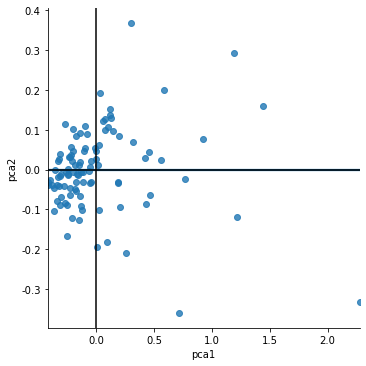

In [88]:
plt.figure(figsize=(15, 10))

sns.lmplot(x="pca1", y="pca2", height=5,data=result, ci=None) #height는 이미지 사이즈
plt.axvline(x=0, color = 'black') 
plt.axhline(y=0, color = 'black')
plt.show()

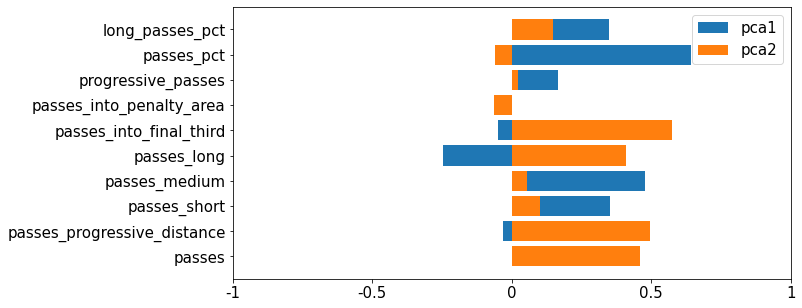

In [267]:
plt.figure(figsize=(10, 5))
plt.rcParams['font.size'] = 15
plt.barh(index,pca1,label='pca1')
plt.barh(index,pca2,label='pca2')
plt.xticks([-1,-0.5,0,0.5,1],('-1','-0.5','0','0.5','1'))
plt.legend()
plt.show()

In [150]:
pca1_pos = result['pca1']>=0
pca1_neg = result['pca1']<0
pca2_pos = result['pca2']>=0
pca2_neg = result['pca2']<0

In [151]:
pca_1 = result[pca1_pos & pca2_pos] #1사분면
pca_2 = result[pca1_neg & pca2_pos] #2사분면
pca_3 = result[pca1_neg & pca2_neg] #3사분면
pca_4 = result[pca1_pos & pca2_neg] #4사분면

<AxesSubplot:ylabel='Density'>

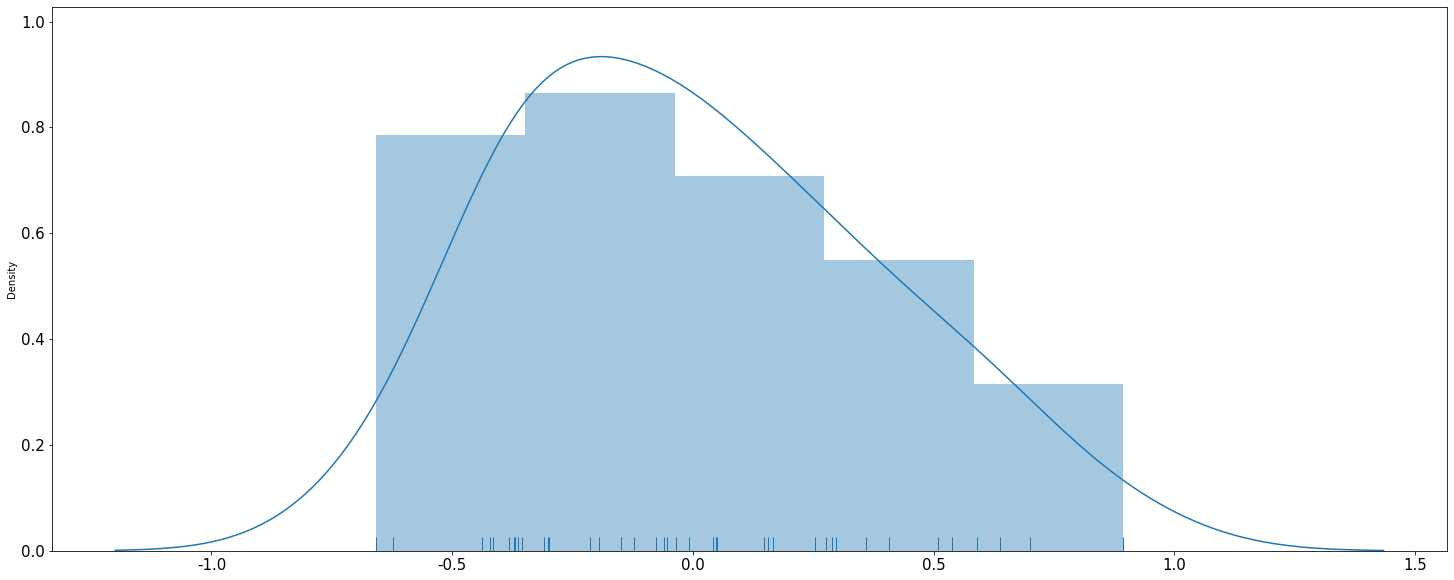

In [268]:
sns.distplot(x=result['pca1'], kde=True, rug=True)

<AxesSubplot:ylabel='Density'>

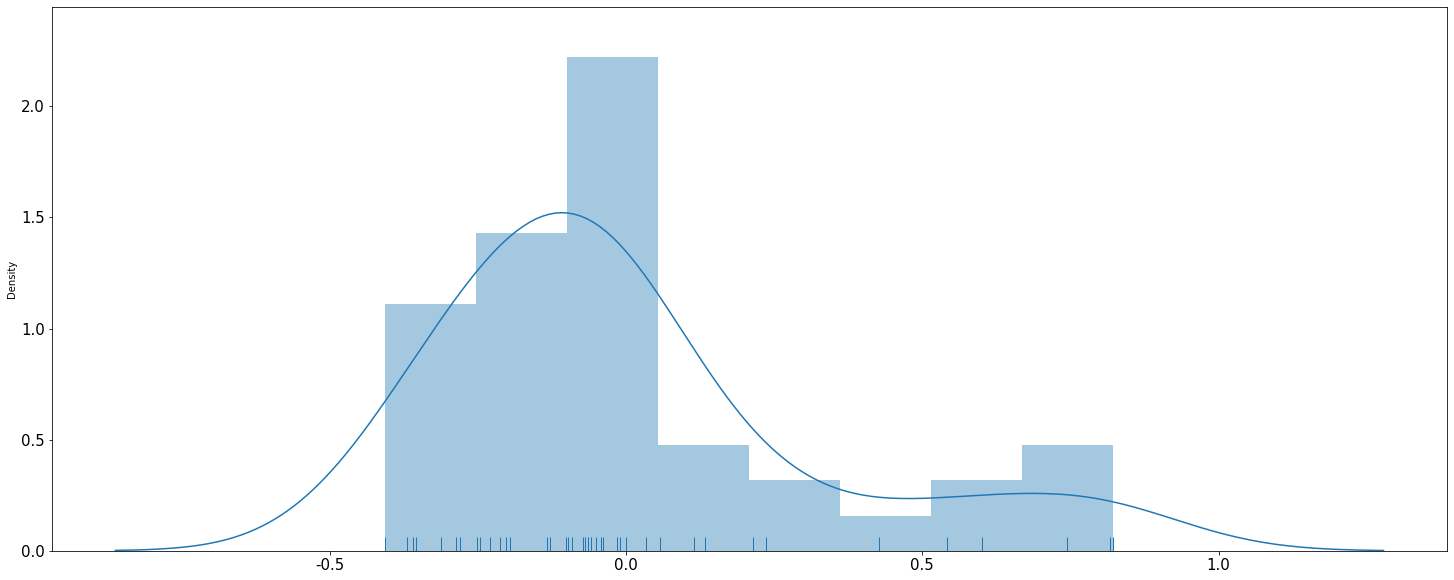

In [269]:
sns.distplot(x=result['pca2'], kde=True, rug=True)

<Figure size 1440x720 with 0 Axes>

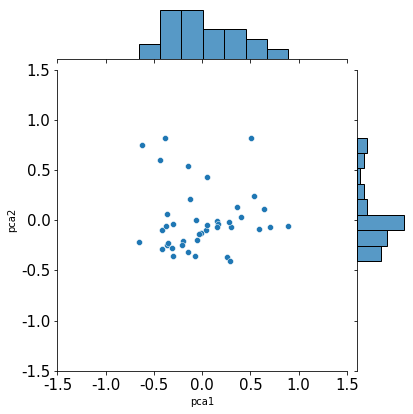

In [270]:
plt.figure(figsize=(20, 10))

sns.jointplot(x='pca1', y='pca2', data=result, xlim = (-1.5,1.5), ylim = (-1.5,1.5))
plt.show()

In [271]:
kkk = result.sort_values(by='pca1',ascending=False)
kkk.reset_index(drop=True)

,player,position,team,age,birth_year,minutes,round,pca1,pca2
0,Unai Simón,GK,Spain,25,1997,387,round of 16,0.893425,-0.059637
1,Yann Sommer,GK,Switzerland,34,1988,270,round of 16,0.701314,-0.064849
2,Manuel Neuer,GK,Germany,36,1986,270,group stage,0.638871,0.114119
3,Ederson,GK,Brazil,29,1993,90,quarter finals,0.590131,-0.090477
4,Thibaut Courtois,GK,Belgium,30,1992,270,group stage,0.537460,0.236604
5,André Onana,GK,Cameroon,26,1996,81,group stage,0.509850,0.817491
6,Guillermo Ochoa,GK,Mexico,37,1985,270,group stage,0.406830,0.033473
7,Kasper Schmeichel,GK,Denmark,36,1986,270,group stage,0.359894,0.133627
8,Dominik Livaković,GK,Croatia,27,1995,693,semi finals,0.297148,-0.072051
9,Saad Al Sheeb,GK,Qatar,32,1990,90,group stage,0.288314,-0.406071
